In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Medium_Sessions.xlsx')
google_organic = pd.read_excel(xls, 'google_organic')
direct = pd.read_excel(xls, 'direct')
googleplex_referral = pd.read_excel(xls, 'googleplex_referral')
analytics_referal = pd.read_excel(xls, 'analytics_referral')
partners_affiliate = pd.read_excel(xls, 'partners_affiliate')
google_cpc = pd.read_excel(xls, 'google_cpc')

In [3]:
#Remove the dates for ease
google_organic = google_organic['Sessions']
direct = direct['Sessions']
googleplex_referral = googleplex_referral['Sessions']
analytics_referal = analytics_referal['Sessions']
partners_affiliate = partners_affiliate['Sessions']
google_cpc = google_cpc['Sessions']

In [4]:
#convert datasets into arrays
google_organic = google_organic.values
direct = direct.values
googleplex_referral = googleplex_referral.values
analytics_referal = analytics_referal.values
partners_affiliate = partners_affiliate.values
google_cpc = google_cpc.values

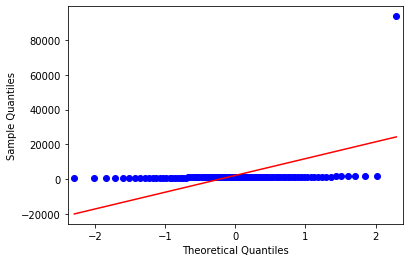

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(google_organic, line='s')
pyplot.show()

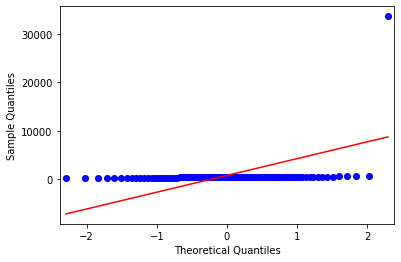

In [6]:
qqplot(direct, line='s')
pyplot.show()

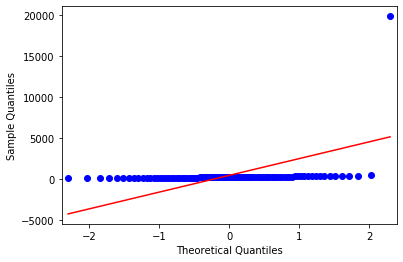

In [7]:
qqplot(googleplex_referral, line='s')
pyplot.show()

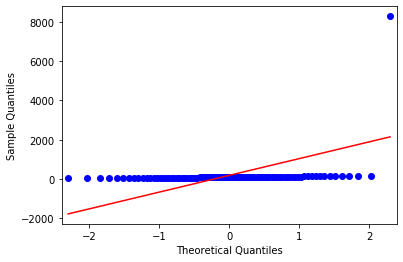

In [8]:
qqplot(analytics_referal, line='s')
pyplot.show()

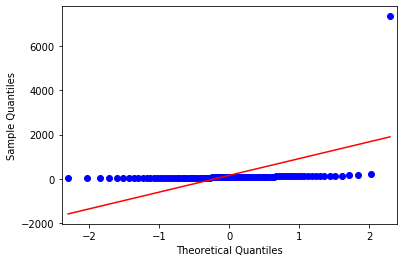

In [9]:
qqplot(partners_affiliate, line='s')
pyplot.show()

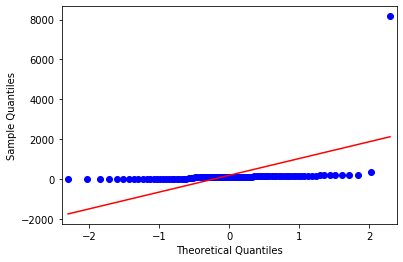

In [10]:
qqplot(google_cpc, line='s')
pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [11]:
names = ["google_organic", "direct", "googleplex_referral", "analytics_referal", "partners_affiliate", "google_cpc"]
for index, i in enumerate((google_organic, direct, googleplex_referral, analytics_referal,partners_affiliate,google_cpc)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

google_organic
Statistics=0.095, p=0.000
Sample does not look Gaussian (reject H0)
direct
Statistics=0.095, p=0.000
Sample does not look Gaussian (reject H0)
googleplex_referral
Statistics=0.106, p=0.000
Sample does not look Gaussian (reject H0)
analytics_referal
Statistics=0.102, p=0.000
Sample does not look Gaussian (reject H0)
partners_affiliate
Statistics=0.108, p=0.000
Sample does not look Gaussian (reject H0)
google_cpc
Statistics=0.123, p=0.000
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [12]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [13]:
stat, p = kruskal(google_organic, direct, googleplex_referral, analytics_referal,partners_affiliate,google_cpc)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=399.268, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [14]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### Google_organic against every other Medium

In [15]:
#Google_organic every other Medium
names = ["direct", "googleplex_referral", "analytics_referal", "partners_affiliate", "google_cpc"]
for index, i in enumerate((direct, googleplex_referral, analytics_referal,partners_affiliate,google_cpc)):
    stat, p = ranksums(google_organic,i)
    print('Google_organic -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Google_organic - direct
Statistics=11.373, p=0.000
The difference between the two datasets is significant (reject H0)
Google_organic - googleplex_referral
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Google_organic - analytics_referal
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Google_organic - partners_affiliate
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Google_organic - google_cpc
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)


### Direct against every other Medium

In [16]:
#Direct against every other Medium
names = ["googleplex_referral", "analytics_referal", "partners_affiliate", "google_cpc"]
for index, i in enumerate((googleplex_referral, analytics_referal,partners_affiliate,google_cpc)):
    stat, p = ranksums(direct,i)
    print('Direct -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Direct - googleplex_referral
Statistics=8.465, p=0.000
The difference between the two datasets is significant (reject H0)
Direct - analytics_referal
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Direct - partners_affiliate
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Direct - google_cpc
Statistics=11.322, p=0.000
The difference between the two datasets is significant (reject H0)


### Googleplex_referral against every other Medium

In [17]:
#Googleplex_referral against every other Medium
names = ["analytics_referal", "partners_affiliate", "google_cpc"]
for index, i in enumerate((analytics_referal,partners_affiliate,google_cpc)):
    stat, p = ranksums(googleplex_referral,i)
    print('Googleplex_referral -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Googleplex_referral - analytics_referal
Statistics=7.917, p=0.000
The difference between the two datasets is significant (reject H0)
Googleplex_referral - partners_affiliate
Statistics=9.240, p=0.000
The difference between the two datasets is significant (reject H0)
Googleplex_referral - google_cpc
Statistics=7.544, p=0.000
The difference between the two datasets is significant (reject H0)


### Analytics_referal against Partners_affiliate and Google_cpc

In [18]:
#Analytics_referal against Partners_affiliate and Google_cpc
names = ["partners_affiliate", "google_cpc",]
for index, i in enumerate((partners_affiliate,google_cpc)):
    stat, p = ranksums(analytics_referal,i)
    print('Analytics_referal -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Analytics_referal - partners_affiliate
Statistics=2.374, p=0.018
The difference between the two datasets is significant (reject H0)
Analytics_referal - google_cpc
Statistics=-0.241, p=0.810
The difference between the two datasets is not significant (fail to reject H0)


### Partners_affiliate against Google_cpc 

In [19]:
stat, p = ranksums(partners_affiliate, google_cpc)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=-1.363, p=0.173
The difference between the two datasets is not significant (fail to reject H0)
